In [25]:
from Model import Model
import Parameters
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import Util

In [26]:
def moving_average_compare(data):
    return Util.moving_average(data[0,0:,:])

In [27]:
def moving_average_compare_vaccine(data, index):
    return Util.moving_average(data[index,0:,:])

In [28]:
def compute_sdd(act, predict):
    difference = act - predict
    return np.sum(np.square(difference))

In [29]:
infectiousness = 0.045
m1 = Model(forecast_days=0, infectiousness=infectiousness)
m2 = Model(forecast_days=0, infectiousness=infectiousness, prior_immunity=0)
m1.date = 742

# Pre-run plotting

C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\2894029355.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated1, axis=1)), plt.title('vaccine 1')


(3, 1072, 16)


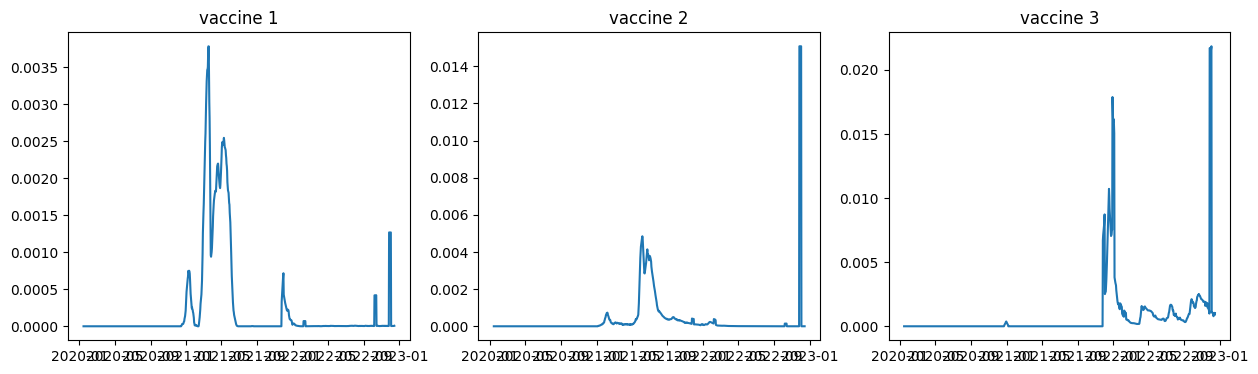

In [30]:
ground_truth_data = m2._model_data
immunity = moving_average_compare(ground_truth_data.time_series_immunity)
vaccinated1 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 0)
vaccinated2 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 1)
vaccinated3 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 2)
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated1, axis=1)), plt.title('vaccine 1')
plt.subplot(1,3,2), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated2, axis=1)), plt.title('vaccine 2')
plt.subplot(1,3,3), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)], np.mean(vaccinated3, axis=1)), plt.title('vaccine 3')
print((ground_truth_data.time_series_vaccinated).shape)

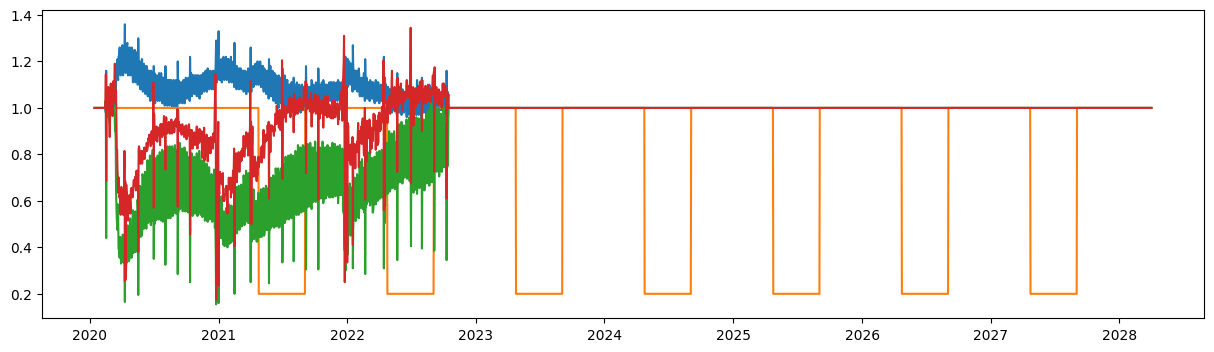

In [31]:
plt.figure(figsize=(15,4))
plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(3000)], m1.dependency.mobility)

### Waning kernels

(<AxesSubplot: >,
  <matplotlib.lines.Line2D at 0x1c842702a60>])

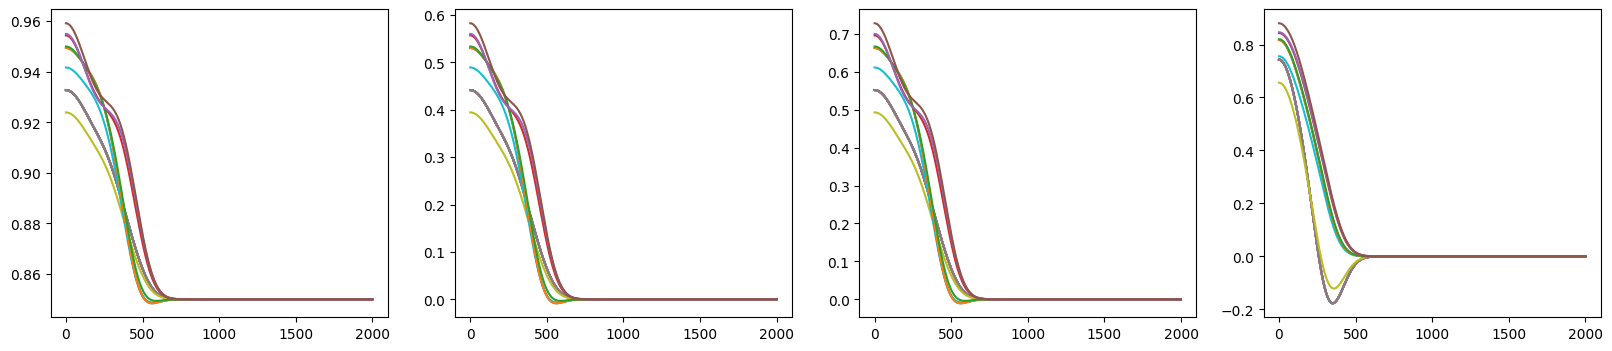

In [32]:
plt.figure(figsize=(20,4))
plt.subplot(1, 4, 1), plt.plot(Parameters.get_immunity_kernel(dose=0))
plt.subplot(1, 4, 2), plt.plot(Parameters.get_immunity_kernel(dose=1))
plt.subplot(1, 4, 3), plt.plot(Parameters.get_immunity_kernel(dose=2))
plt.subplot(1, 4, 4), plt.plot(Parameters.get_immunity_kernel(dose=3))

# Compute immunity!

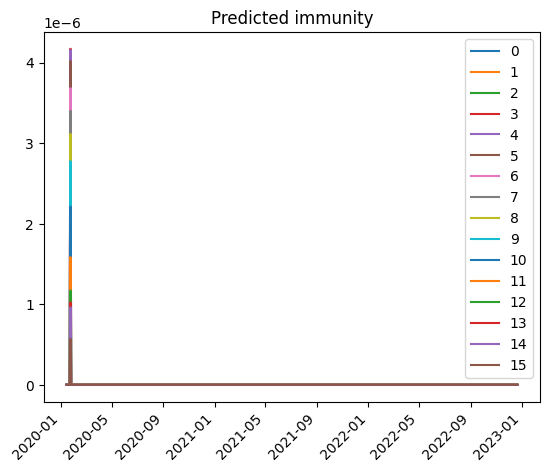

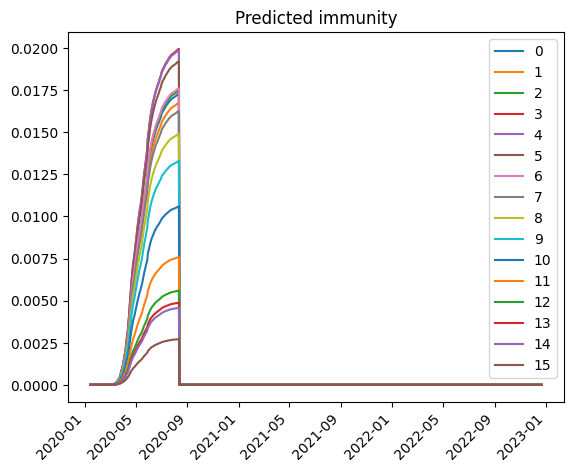

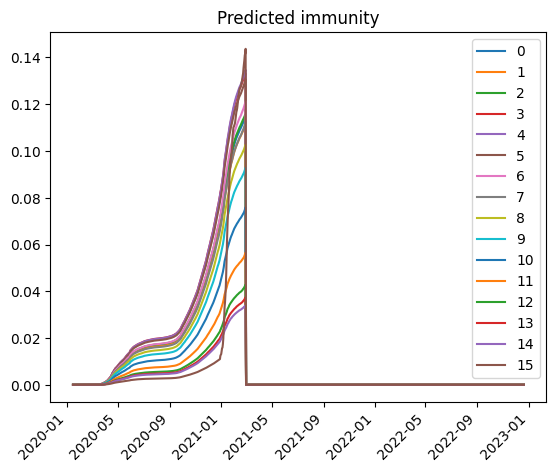

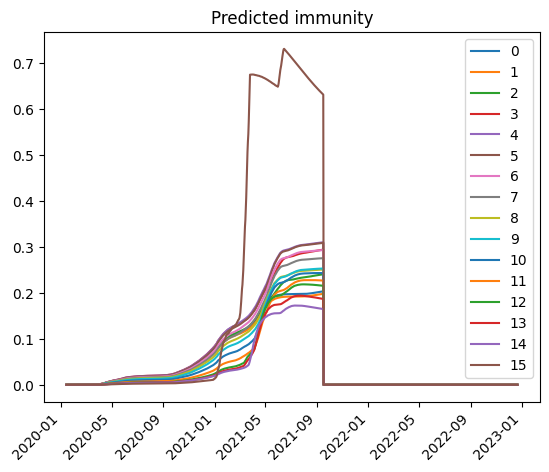

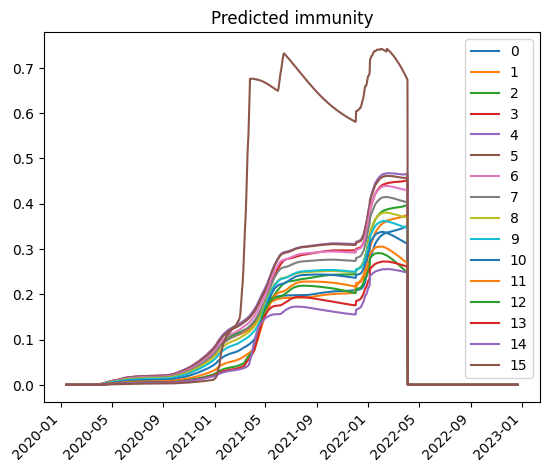

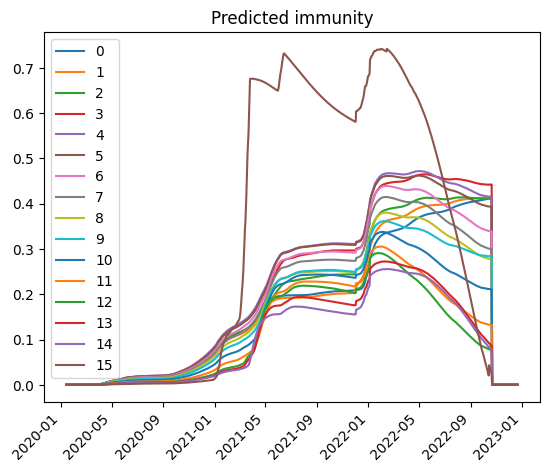

In [33]:
for i in range(1072):
    m1._compute_immunity(i)
    if i % 200 == 10:

        x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1072)]
        for j in range(16):
            slice = m1._model_data.time_series_immunity[0].T[j].T
            plt.plot(x, slice, label=j)
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.show()
    # m2.print_data(m1.date)

## Run the model

C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\3413668418.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


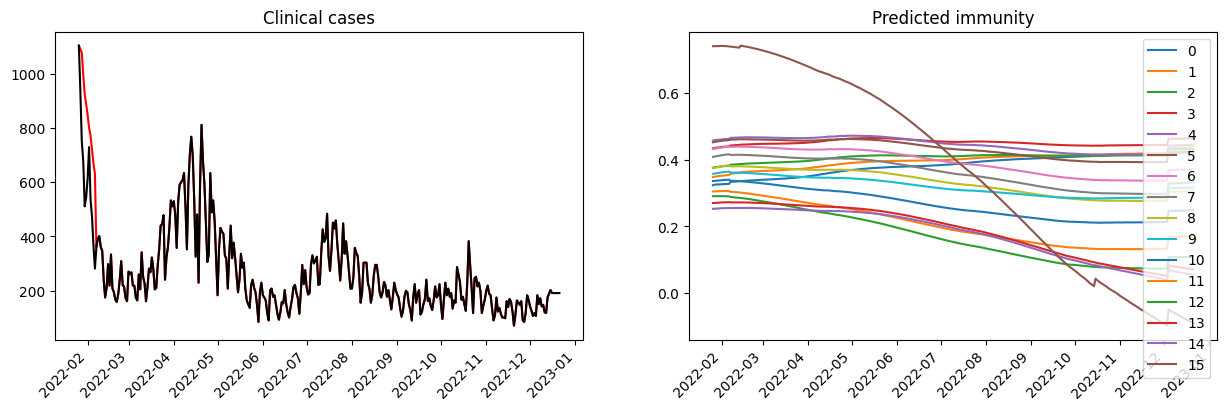

C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\3413668418.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


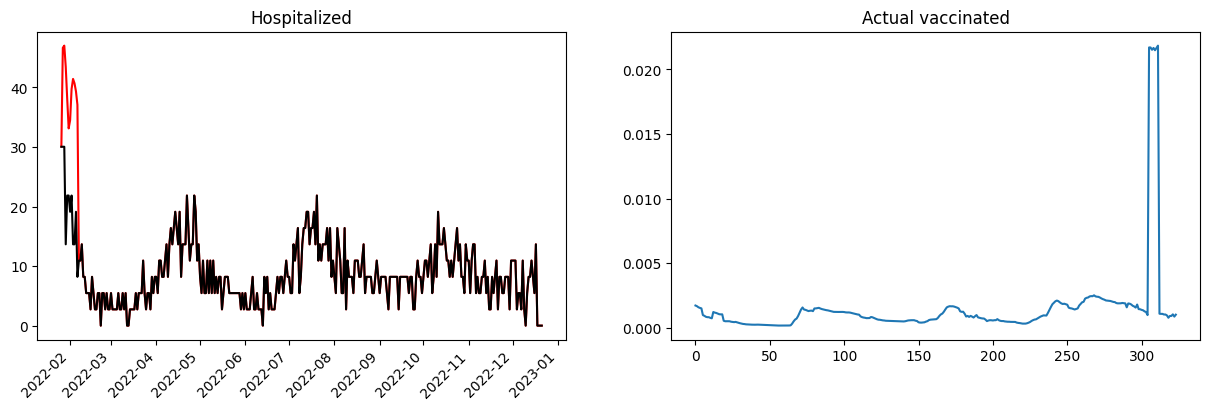

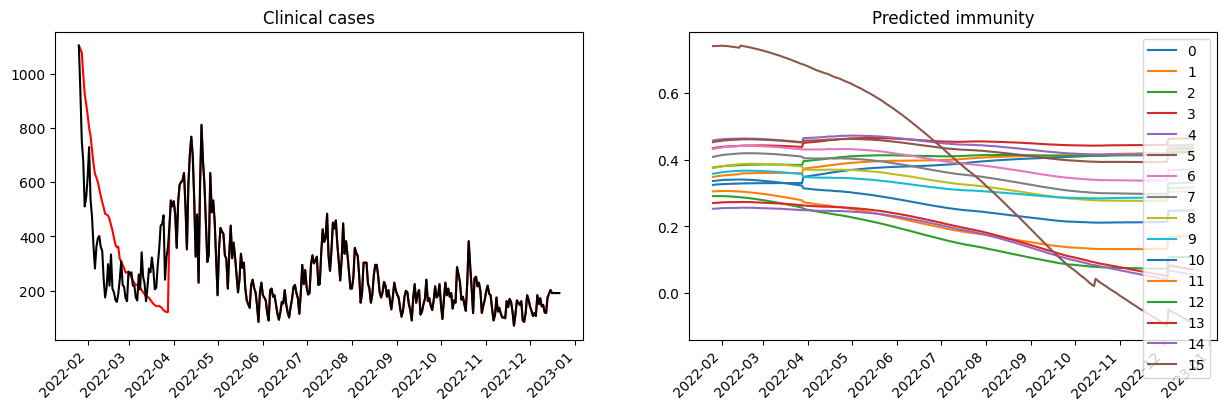

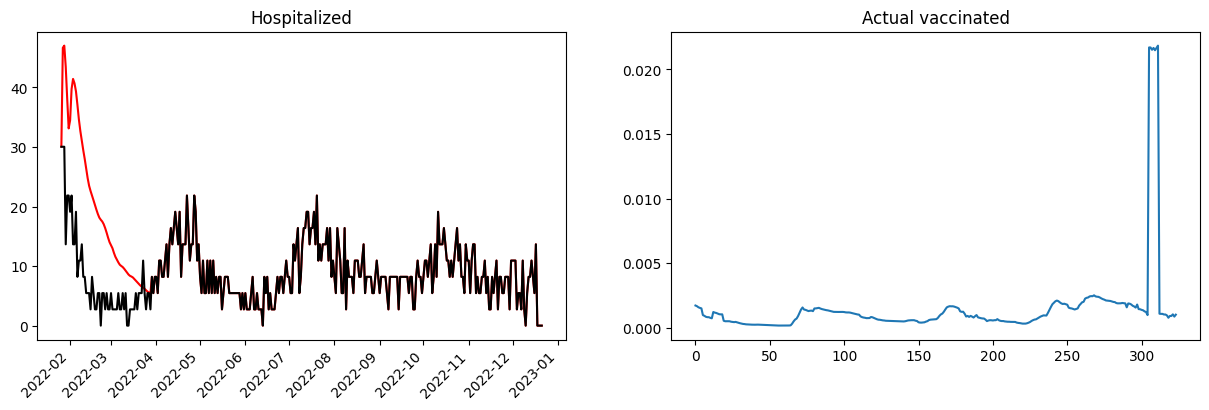

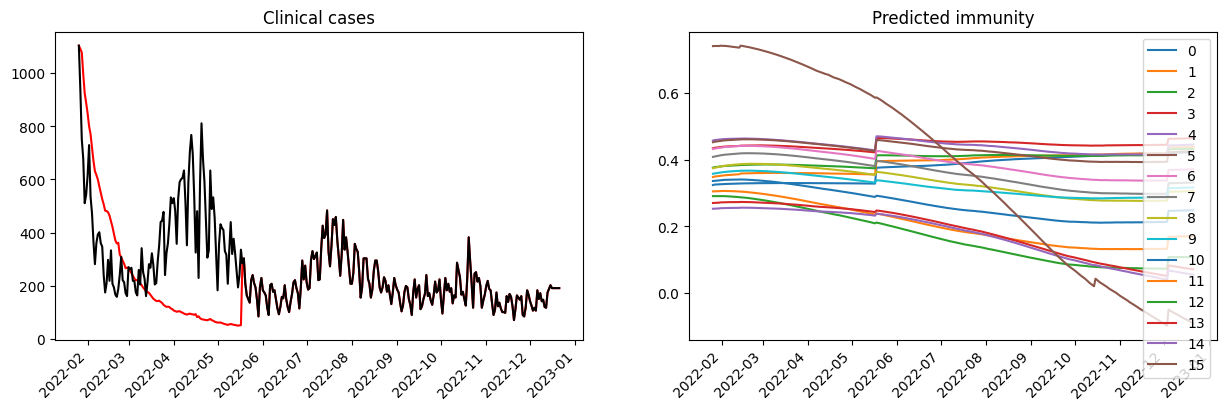

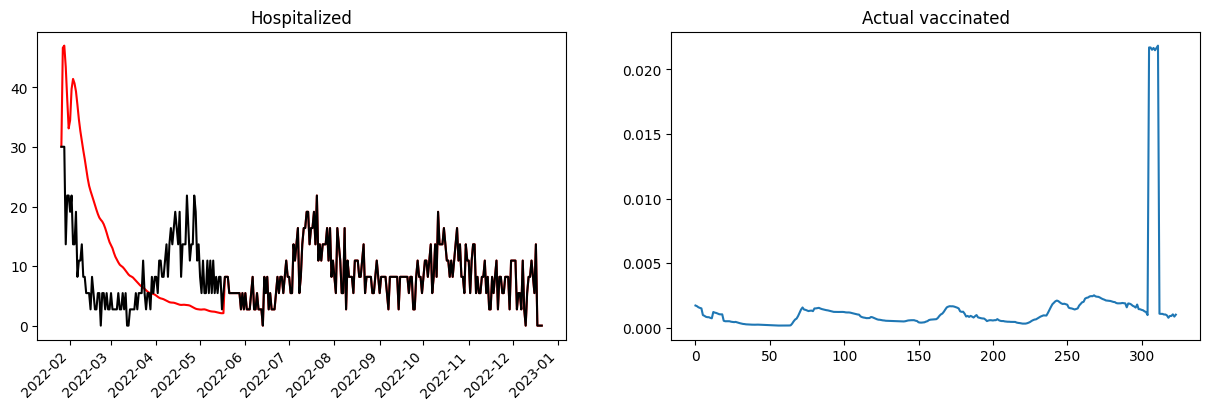

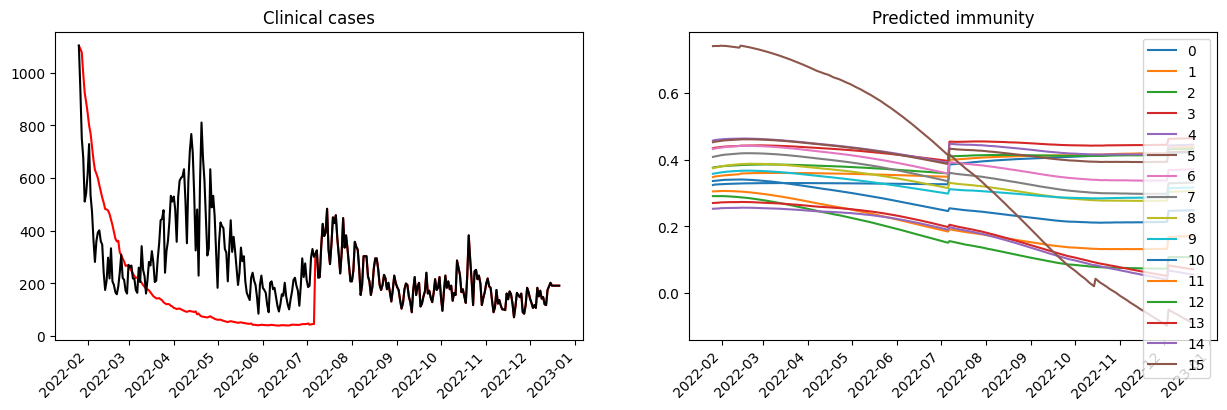

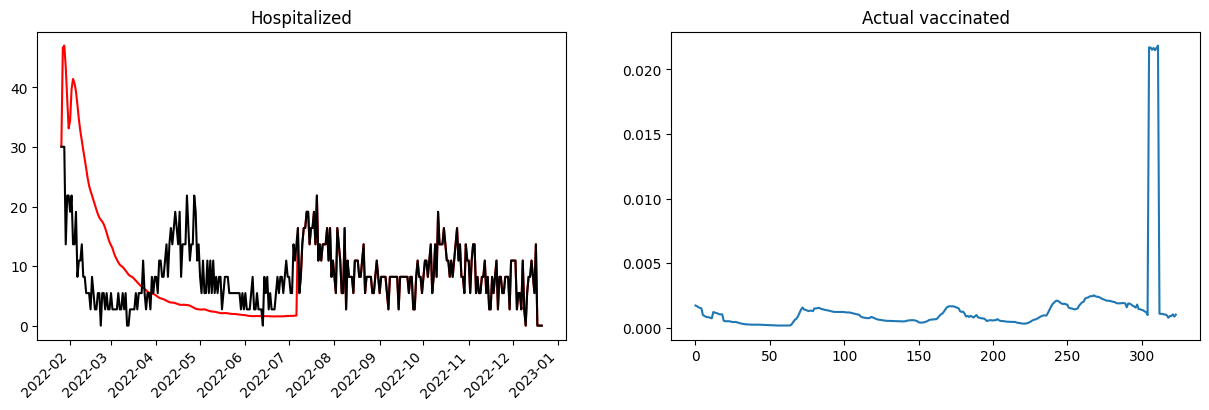

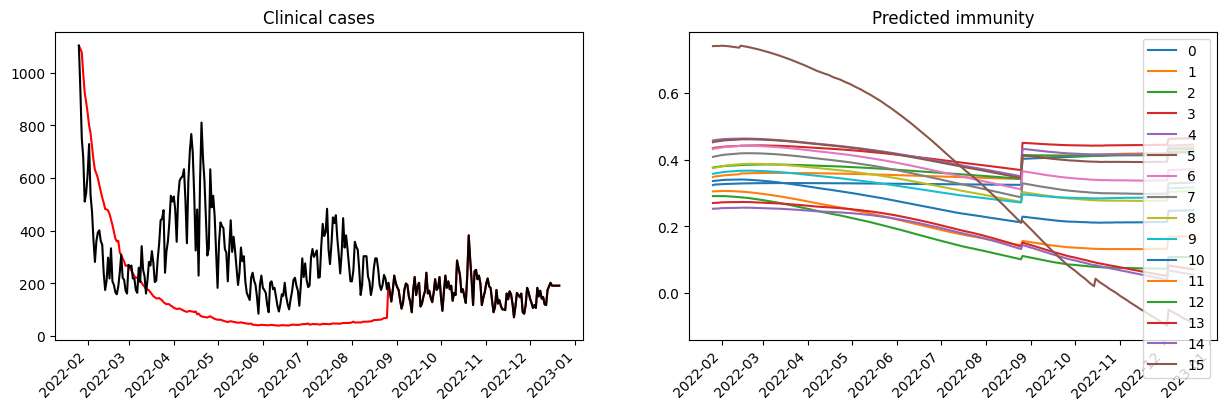

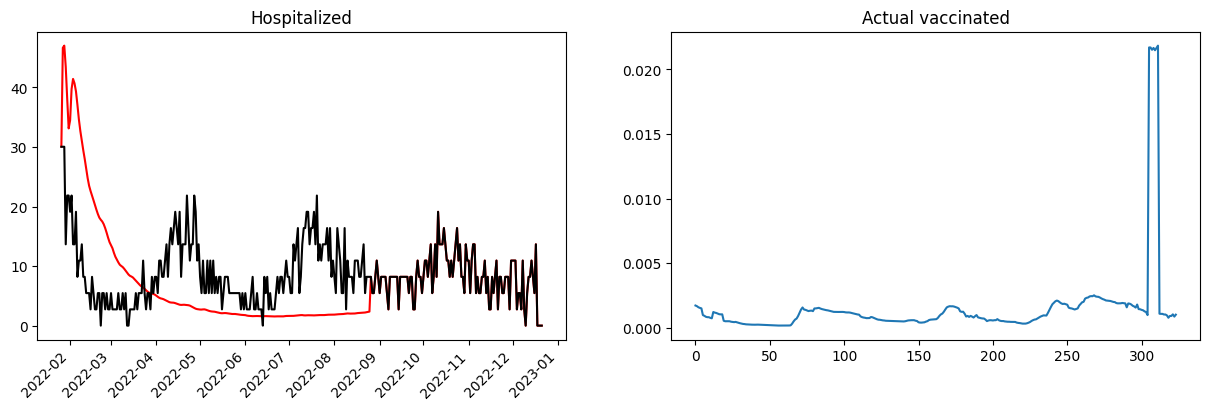

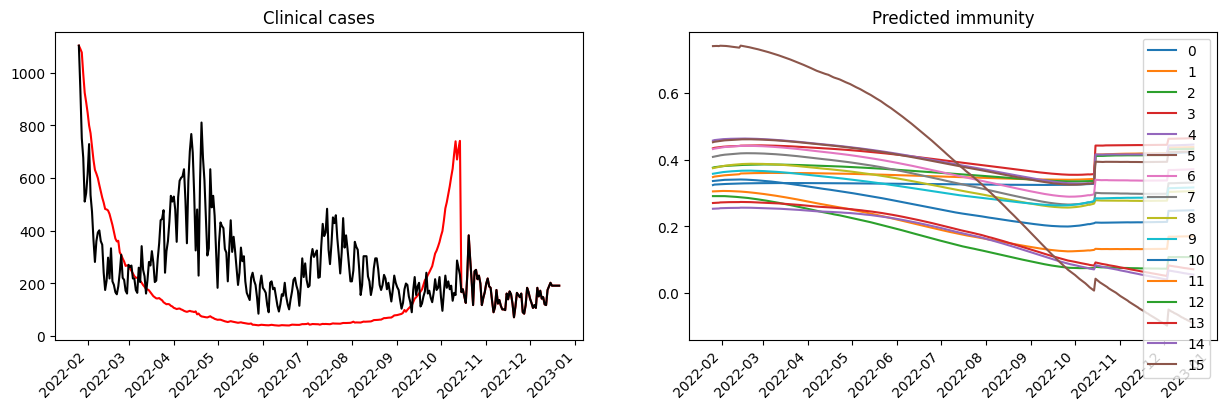

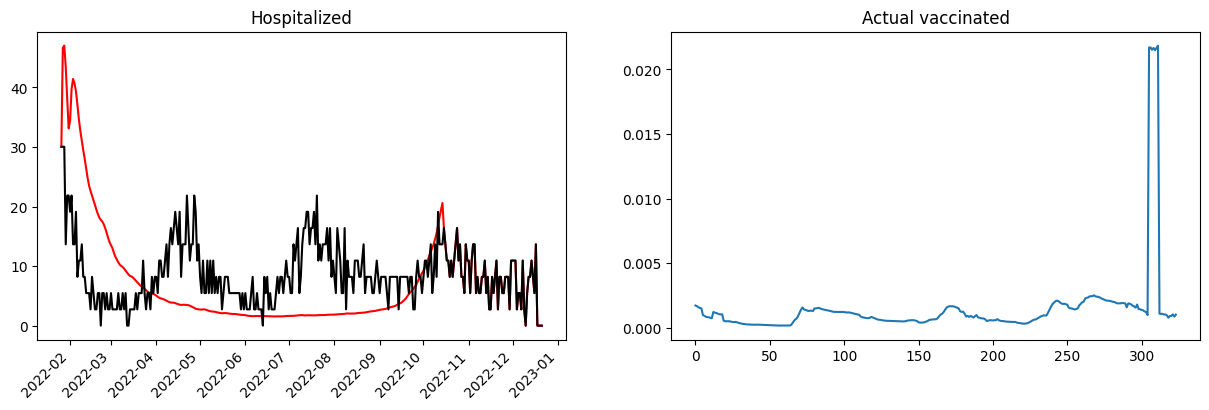

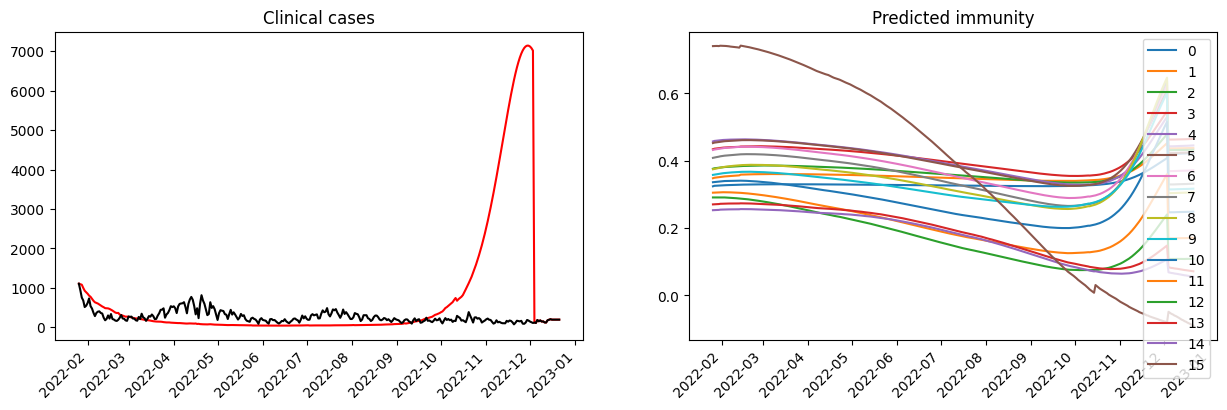

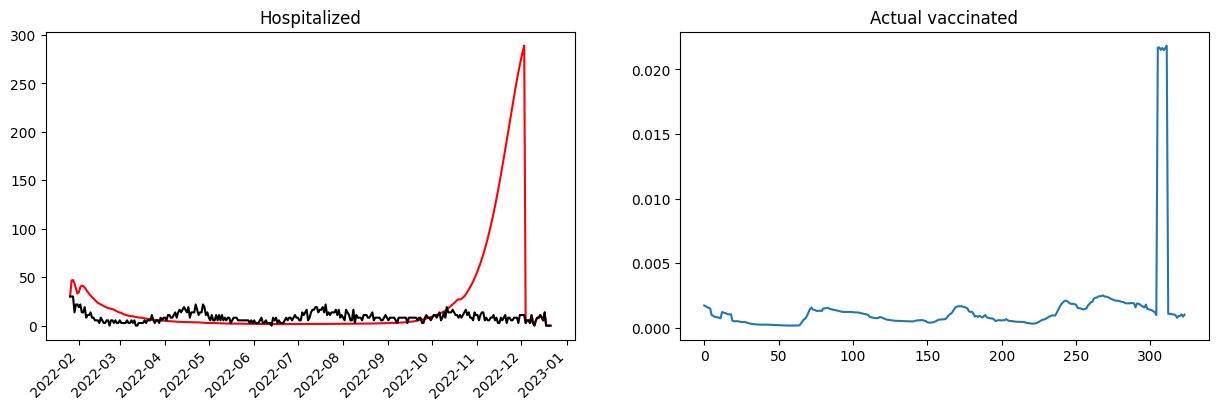

In [34]:
for i in range(1072-m1.date-1):
    m1.run_one_cycle(display_status=False)
    if i % 50 == 10:

        x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j+742) for j in range(330)]
        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 2, 1)
        plt.plot(x, np.sum((m1._model_data.time_series_clinical_cases[0])[742:], axis=1), color='red')
        plt.plot(x, np.sum((m2._model_data.time_series_clinical_cases[0])[742:], axis=1), color='black')
        plt.xticks(rotation=45, ha='right')
        plt.title('Clinical cases')
        plt.subplot(1, 2, 2)
        for j in range(16):
            slice = m1._model_data.time_series_immunity[0].T[j].T
            plt.plot(x, slice[742:], label=j)
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.show()

        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 2, 1)
        plt.plot(x, np.sum((m1._model_data.time_series_hospitalized[0])[742:], axis=1), color='red')
        plt.plot(x, np.sum((m2._model_data.time_series_hospitalized[0])[742:], axis=1), color='black')
        plt.title('Hospitalized')
        plt.xticks(rotation=45, ha='right')
        plt.subplot(1, 2 ,2), plt.plot(np.mean(moving_average_compare_vaccine(m1._model_data.time_series_vaccinated, 2)[742:], axis=1)), plt.title('vaccine 3')
        plt.title('Actual vaccinated')
        plt.show()
    # m2.print_data(m1.date)

In [35]:
predicated_data = m1._model_data
ground_truth_clinical = moving_average_compare(m2._model_data.time_series_clinical_cases)
predicted_clinical = moving_average_compare(predicated_data.time_series_clinical_cases)
print(compute_sdd(ground_truth_clinical, predicted_clinical))

122297826.92789438


C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\334893521.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(x, ground_truth_clinical)


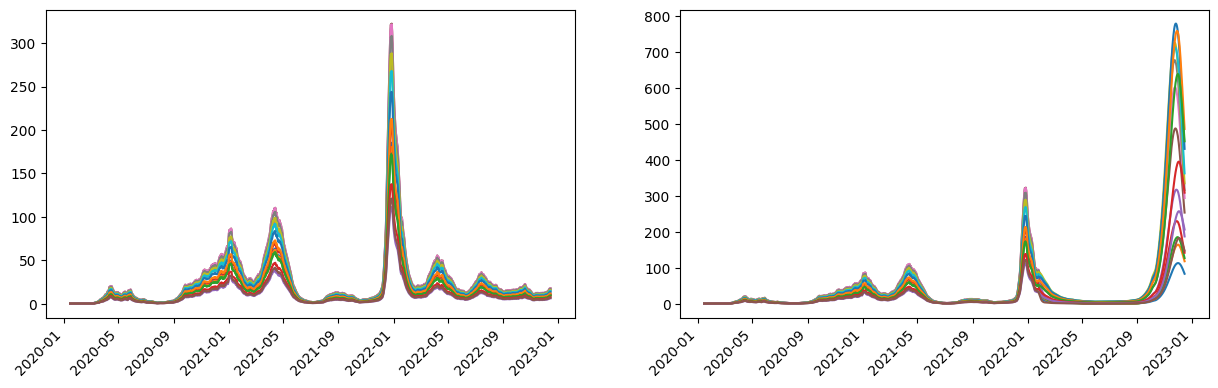

In [36]:
x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1066)]

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(x, ground_truth_clinical)
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2), plt.plot(x, predicted_clinical)
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
ground_truth_deaths = moving_average_compare(m2._model_data.time_series_deaths)
predicted_deaths = moving_average_compare(m1._model_data.time_series_deaths)
print(compute_sdd(ground_truth_deaths, predicted_deaths))

7640.923890117552


C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\3729232606.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_deaths)


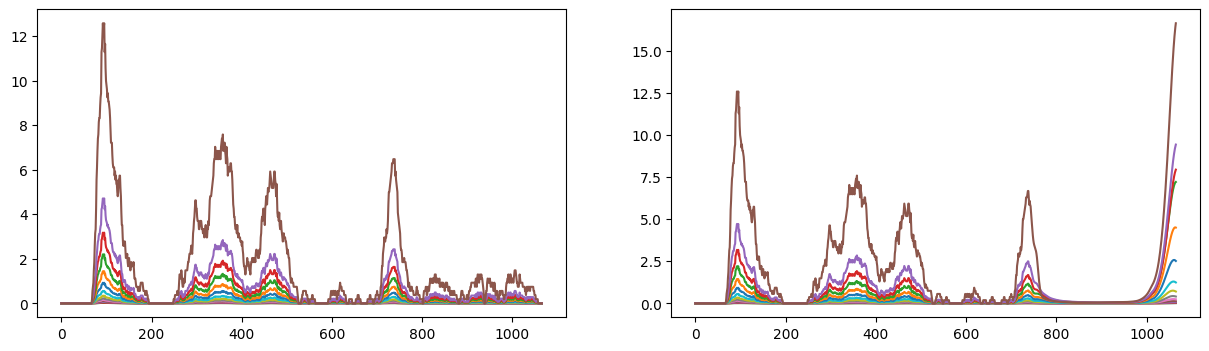

In [38]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_deaths)
plt.subplot(1, 2, 2), plt.plot(predicted_deaths)
plt.show()

In [39]:
ground_truth_hosp = moving_average_compare(m2._model_data.time_series_hospitalized)
predicted_hosp = moving_average_compare(m1._model_data.time_series_hospitalized)
print(compute_sdd(ground_truth_hosp, predicted_hosp))

245015.54810064728


C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\1101670465.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_hosp)


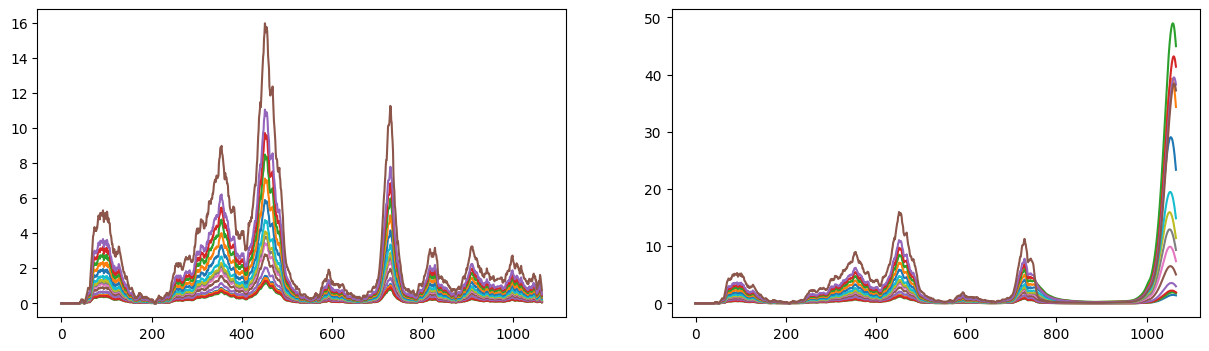

In [40]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_hosp)
plt.subplot(1, 2, 2), plt.plot(predicted_hosp)
plt.show()

In [41]:
ground_truth_icu = moving_average_compare(m2._model_data.time_series_ICU)
predicted_icu = moving_average_compare(m1._model_data.time_series_ICU)
print(compute_sdd(ground_truth_icu, predicted_icu))

10030.511438762105


C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\411388505.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_icu)


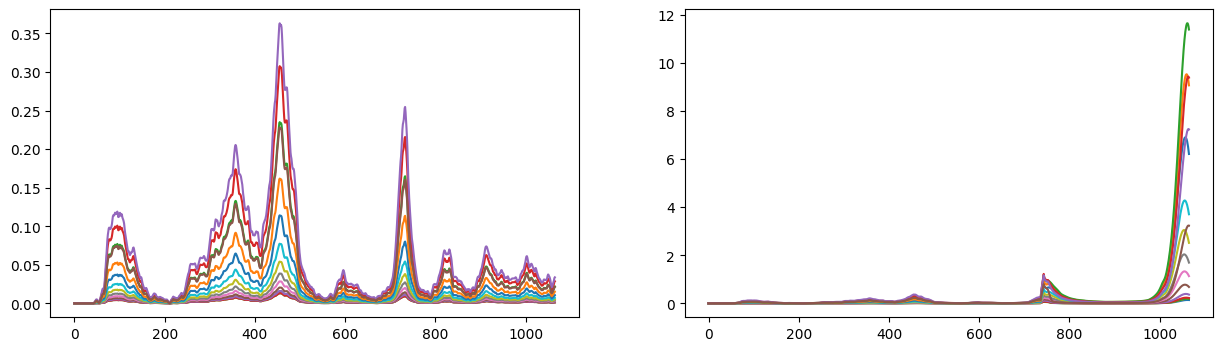

In [42]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_icu)
plt.subplot(1, 2, 2), plt.plot(predicted_icu)
plt.show()

In [43]:
print(np.sum(m2._model_data.time_series_deaths))

14192.330358999987


C:\Users\loveb\AppData\Local\Temp\ipykernel_52604\1064904106.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(immunity)


(<AxesSubplot: >,
  <matplotlib.lines.Line2D at 0x1c8472d6220>])

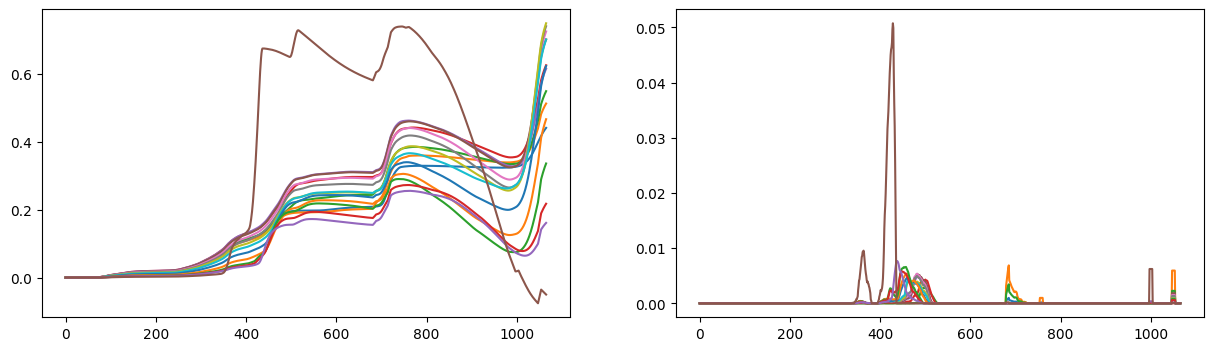

In [44]:
immunity = moving_average_compare(m1._model_data.time_series_immunity)
vaccine = moving_average_compare(m1._model_data.time_series_vaccinated)
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(immunity)
plt.subplot(1, 2, 2), plt.plot(vaccine)

In [45]:
# m1.save_to_file()

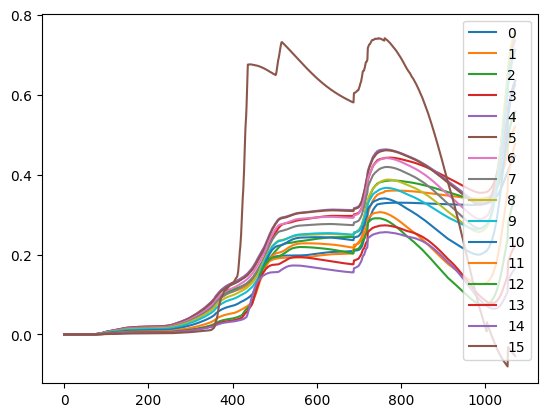

In [46]:
for i in range(16):
    slice = m1._model_data.time_series_immunity[0].T[i].T
    plt.plot(slice, label=i)
plt.legend()
plt.show()

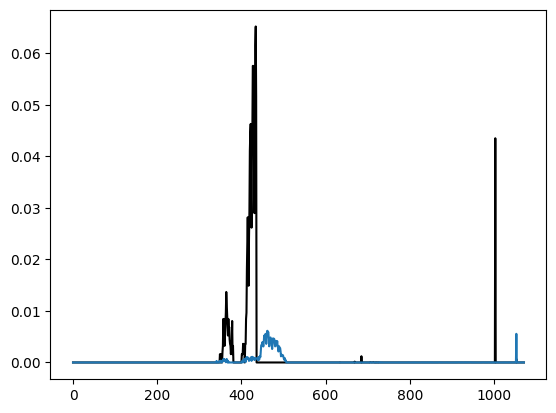

In [47]:

slice = m1._model_data.time_series_vaccinated[0].T[15].T
plt.plot(slice, color='black')
slice = m1._model_data.time_series_vaccinated[0].T[14].T
slice = m1._model_data.time_series_vaccinated[0].T[13].T
slice = m1._model_data.time_series_vaccinated[0].T[12].T
slice = m1._model_data.time_series_vaccinated[0].T[11].T
plt.plot(slice)
plt.show()

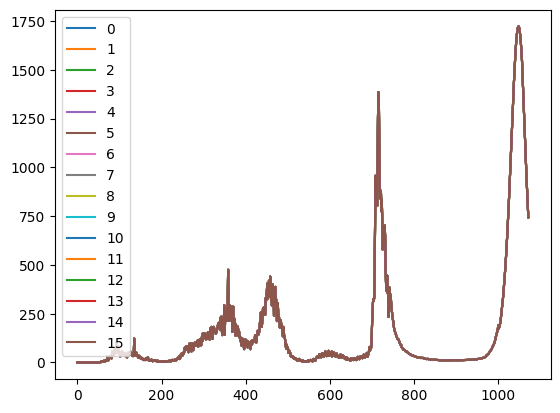

In [48]:
for i in range(16):
    slice = m1._model_data.time_series_active_cases[0].T[5].T
    plt.plot(slice, label=i)
plt.legend()
plt.show()